# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
#dummify gentoo

In [1]:
pip install palmerpenguins

In [92]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import r2_score
from palmerpenguins import load_penguins
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve



In [9]:
import pandas as pd
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()
penguins['is_gentoo'] = penguins.species == 'Gentoo' #its t/f and computer will understand
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,is_gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,False
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,False


In [10]:
X = penguins.drop(columns=["is_gentoo", "species"])
y = penguins["is_gentoo"]

In [14]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

log_pipeline = Pipeline(
  [("preprocessing", ct),
  ("logistic", LogisticRegression())]
)

In [12]:
accuracy= cross_val_score(log_pipeline, X, y, cv = 5, scoring = "accuracy").mean()
accuracy.mean()

1.0

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [18]:
X = penguins.drop("species", axis= 1)
y = penguins["species"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#knn classifier
ct = ColumnTransformer(
    [
      ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
      ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

knn_model1= Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier(n_neighbors=3))]#clasifier predicts category
).set_output(transform="pandas")


In [24]:
#knn classifier
ct = ColumnTransformer(
    [
      ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
      ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

knn_model2= Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier(n_neighbors=5))]#clasifier predicts category
).set_output(transform="pandas")


In [55]:
# tree pipeline

ct = ColumnTransformer(
    [
      ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
      ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="drop"
).set_output(transform="pandas")

tree_model1= Pipeline(
    [("preprocessing", ct),
    ("decision_tree", DecisionTreeClassifier(max_depth=5))]
).set_output(transform="pandas")



In [56]:
# tree pipeline

ct = ColumnTransformer(
    [
      ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
      ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

tree_model2= Pipeline(
    [("preprocessing", ct),
    ("decision_tree", DecisionTreeClassifier(max_depth=10))]
).set_output(transform="pandas")


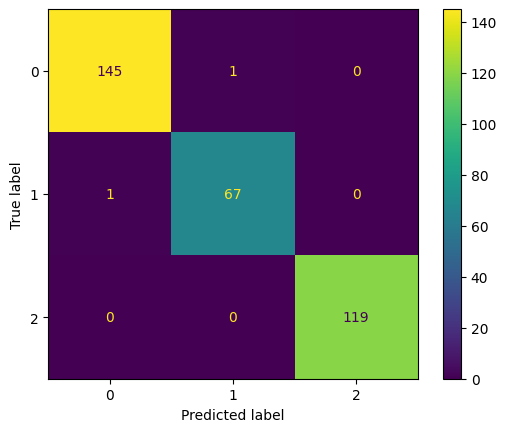

In [88]:
#confusion matrix

# Train the KNN model
knn_model1.fit(X, y)

# Predict on the test set
y_pred = knn_model1.predict(X)

# Generate the confusion matrix
cm1 = confusion_matrix(y, y_pred)
cm1
ConfusionMatrixDisplay(cm1).plot()

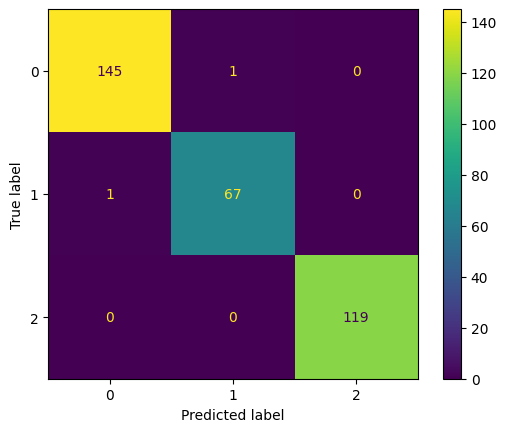

In [89]:
#confusion matrix

# Train the KNN model
knn_model2.fit(X, y)

# Predict on the test set
y_pred2 = knn_model2.predict(X)

# Generate the confusion matrix
cm2 = confusion_matrix(y, y_pred2)
cm2
ConfusionMatrixDisplay(cm2).plot()

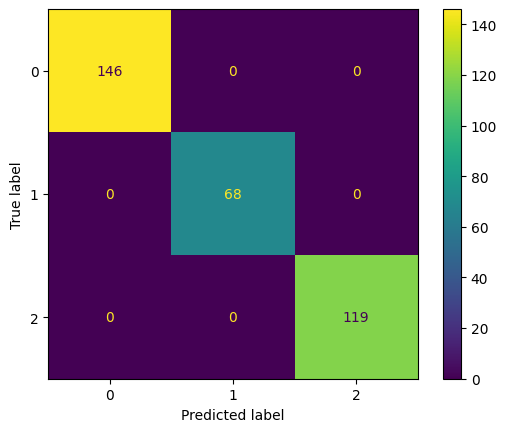

In [90]:
#confusion matrix

# Train the KNN model
tree_model1.fit(X, y)

# Predict on the test set
y_pred3 = tree_model1.predict(X)

# Generate the confusion matrix
cm3 = confusion_matrix(y, y_pred3)
cm3
ConfusionMatrixDisplay(cm3).plot()

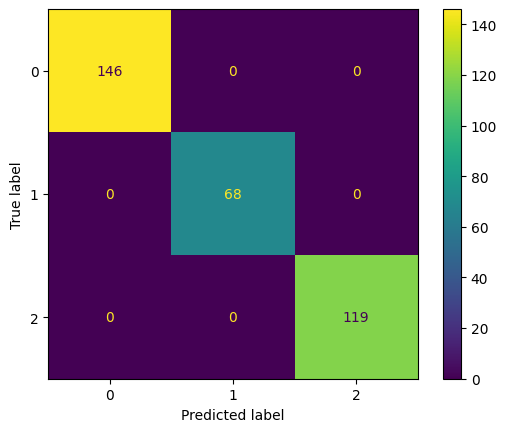

In [96]:
#confusion matrix

# Train the KNN model
tree_model2.fit(X, y)

# Predict on the test set
y_pred4 = tree_model2.predict(X)

# Generate the confusion matrix
cm4 = confusion_matrix(y, y_pred4)
cm4
ConfusionMatrixDisplay(cm4).plot()
probability = tree_model2.predict_proba(X)[:,2]

In [66]:
accuracy_score(y, y_pred)

0.993993993993994

In [67]:
accuracy_score(y, y_pred2)

0.993993993993994

In [69]:
accuracy_score(y, y_pred3)

1.0

In [68]:
accuracy_score(y, y_pred4)

1.0

In [75]:
precision_score(y, y_pred, average=None)

array([0.99315068, 0.98529412, 1.        ])

In [78]:
precision_score(y, y_pred2, average=None)

array([0.99315068, 0.98529412, 1.        ])

In [79]:
precision_score(y, y_pred3, average=None)

array([1., 1., 1.])

In [80]:
precision_score(y, y_pred4, average=None)

array([1., 1., 1.])

In [84]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
   Chinstrap       0.99      0.99      0.99        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



In [85]:
print(classification_report(y, y_pred2))

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
   Chinstrap       0.99      0.99      0.99        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



In [86]:
print(classification_report(y, y_pred3))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       146
   Chinstrap       1.00      1.00      1.00        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



In [87]:
print(classification_report(y, y_pred4))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       146
   Chinstrap       1.00      1.00      1.00        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



In [104]:
ytest= y=="Gentoo"

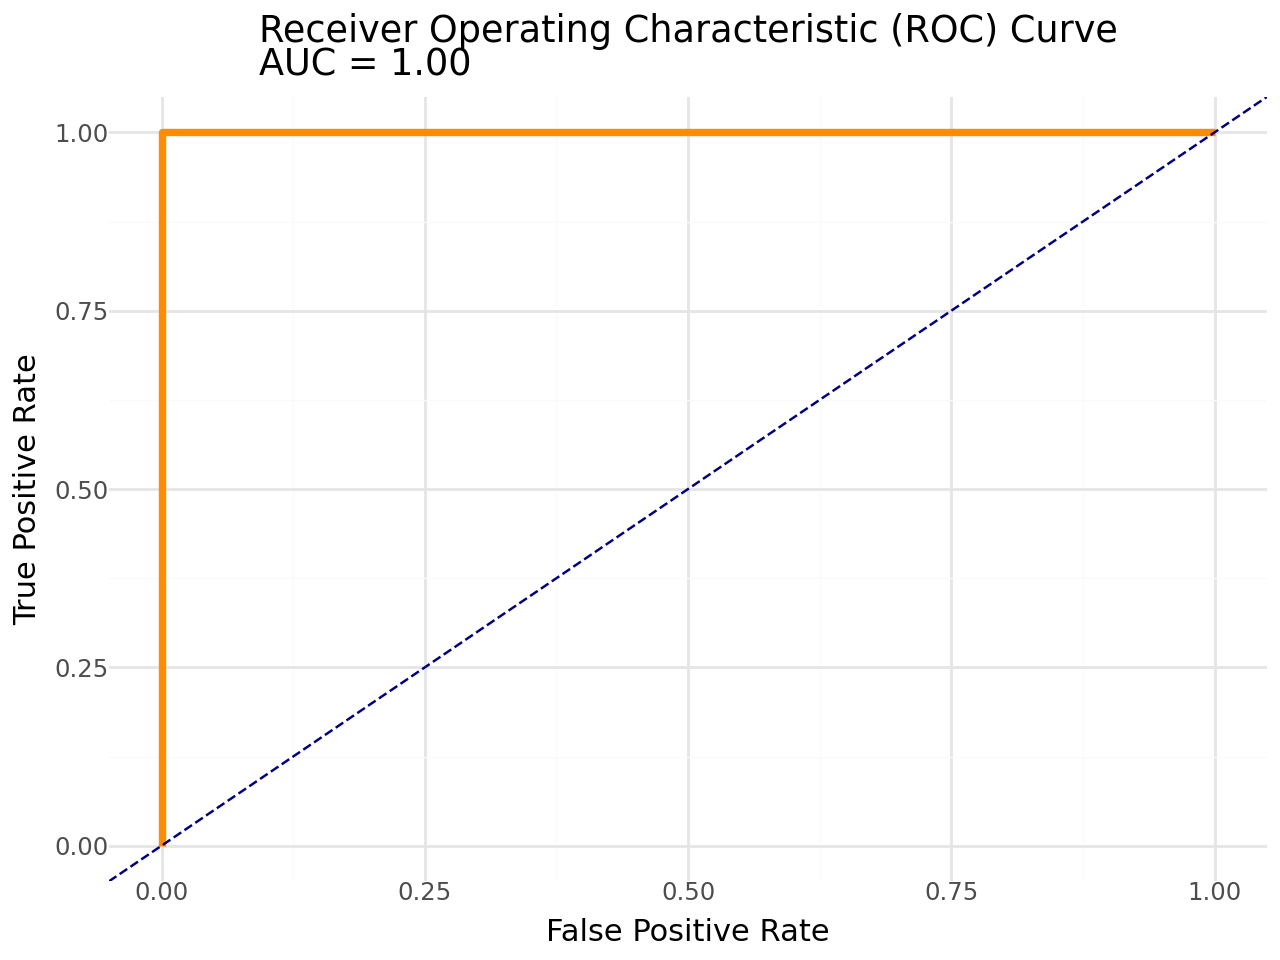

In [105]:
from sklearn.metrics import roc_curve, auc, classification_report
import pandas as pd
import plotnine as p9

# Assuming y_pred4 contains predicted probabilities for the positive class (for binary classification)
fpr, tpr, thresholds = roc_curve(ytest, probability) #Chat helped
roc_auc = auc(fpr, tpr)

# Create a DataFrame for Plotnine
roc_df = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
})


(p9.ggplot(roc_df, p9.aes(x='False Positive Rate', y='True Positive Rate'))
        + p9.geom_line(color='darkorange', size=1.5)
        + p9.geom_abline(slope=1, intercept=0, linetype='--', color='navy')
        + p9.ggtitle(f'Receiver Operating Characteristic (ROC) Curve\nAUC = {roc_auc:.2f}')
        + p9.xlab('False Positive Rate')
        + p9.ylab('True Positive Rate')
        + p9.theme_minimal())


